## Python ARMA(p,q) Model Fitter
The purpose of this notebook is to get accustomed to the time series modeling capabilites of python, and it's associated libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [3]:
# Load your time series data into a Pandas DataFrame
ar2_data = pd.read_csv('data/ar2_time_series_data.csv', parse_dates=['Date'], index_col='Date')
arma2_3_data = pd.read_csv('data/arma2_3_time_series_data.csv', parse_dates=['Date'], index_col='Date')

# Suppress warning messages
warnings.filterwarnings('ignore')

#### AR(2) Graphing and Modeling

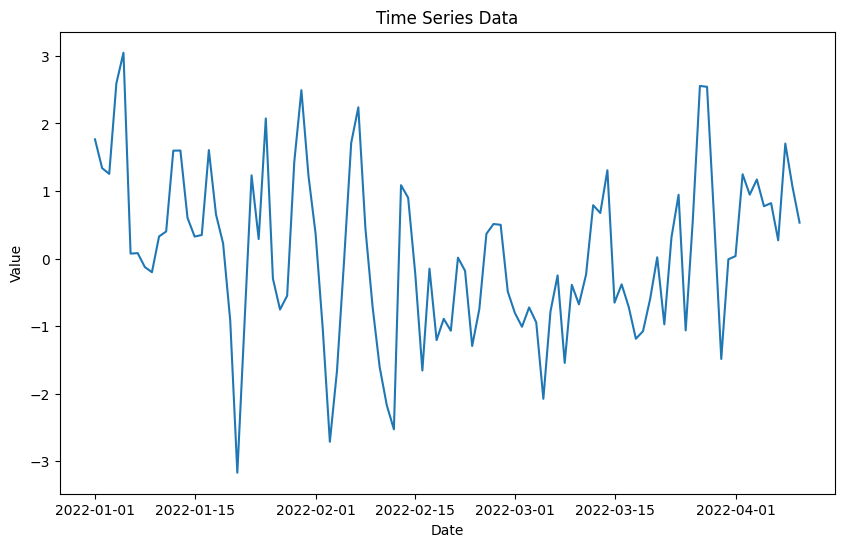

In [4]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(ar2_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Figure size 1000x600 with 0 Axes>

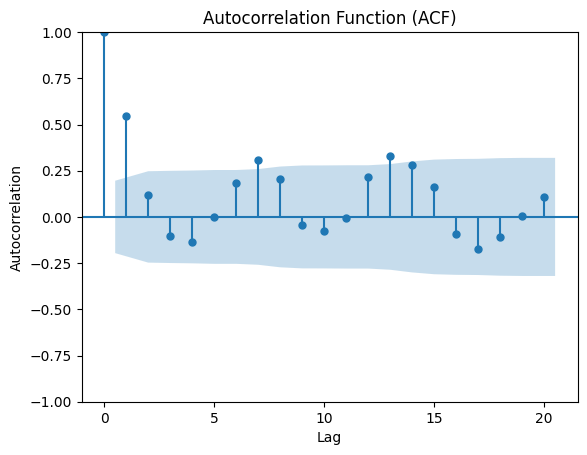

In [5]:
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(ar2_data, lags=20)  # Change the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

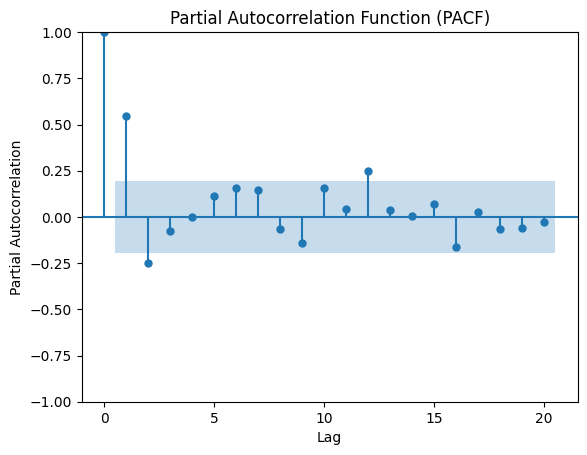

In [6]:
# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(ar2_data, lags=20)  # Change the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [7]:
# Fit ARMA model to the data
model = ARIMA(ar2_data, order=(2, 0, 0))  # Replace p, d, q with appropriate values
results = model.fit()

# Make predictions
forecast = results.forecast(steps=10)  # Replace 10 with the number of steps to forecast

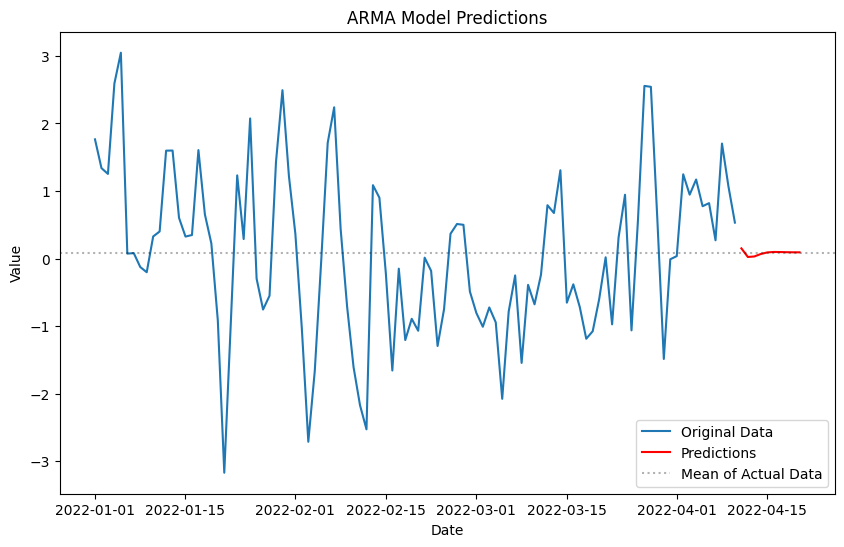

In [8]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(ar2_data, label='Original Data')
plt.plot(forecast, label='Predictions', color='red')

# Plot mean of actual data
mean_actual = ar2_data["Value"].mean()
plt.axhline(mean_actual, linestyle='dotted', color='black', alpha=0.3, label='Mean of Actual Data')

plt.title('ARMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### ARMA(2,3) Graphing and Modeling

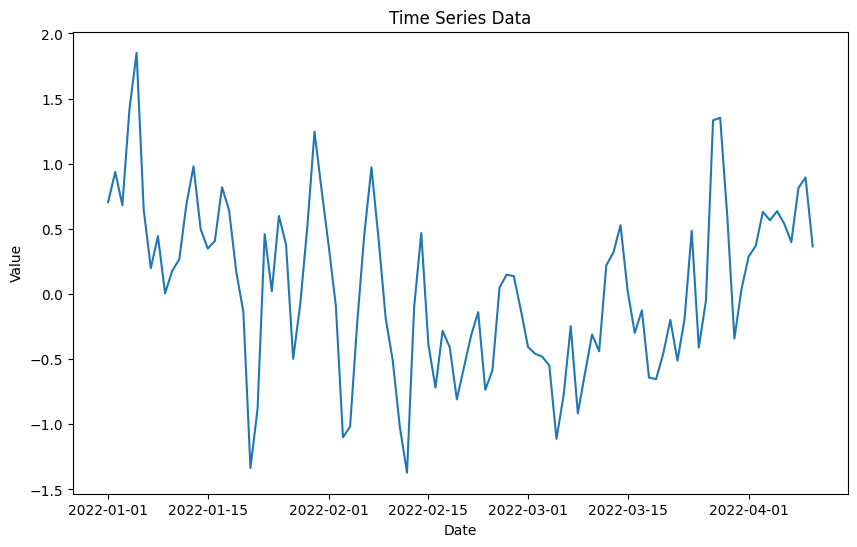

In [9]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(arma2_3_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Figure size 1000x600 with 0 Axes>

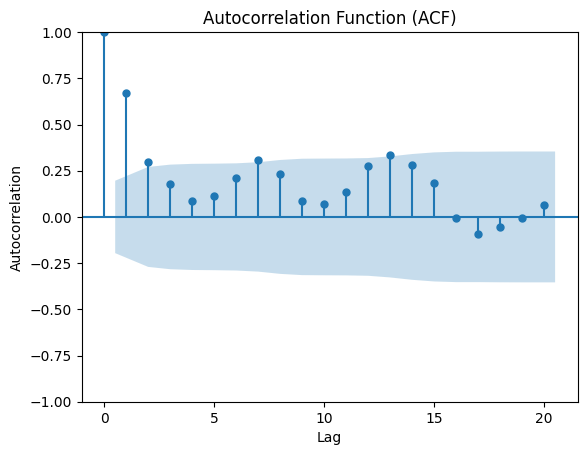

In [29]:
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(arma2_3_data, lags=20)  # Change the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

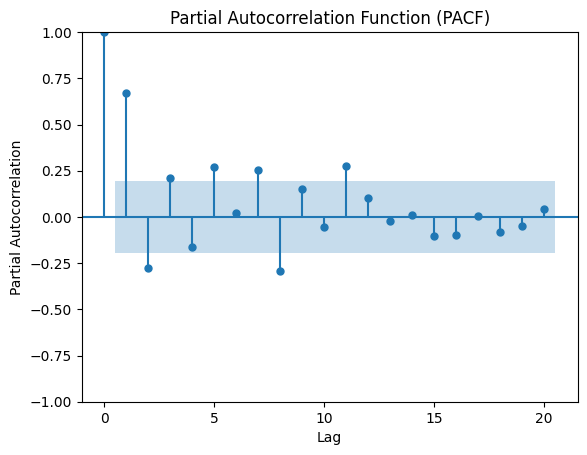

In [30]:
# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(arma2_3_data, lags=20)  # Change the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [31]:
# Define the range of values for p and q
p_range = range(4)  # Change the range as needed
q_range = range(4)  # Change the range as needed

# Initialize variables to store best AIC, BIC, and corresponding p/q values
best_combined_criterion = np.inf
best_p = 0
best_q = 0

# Iterate over all combinations of p and q
for p in p_range:
    for q in q_range:
        try:
            # Fit ARIMA model with current p and q values
            model = ARIMA(arma2_3_data, order=(p, 0, q))  # Assuming the data is stationary
            results = model.fit()

            # Calculate AIC and BIC
            current_aic = results.aic
            current_bic = results.bic
            
            # Combine AIC and BIC (you can use other criteria as well)
            current_combined_criterion = current_aic + current_bic

            # Update best AIC and corresponding p/q values if current combined criterion is lower
            if current_combined_criterion < best_combined_criterion:
                best_combined_criterion = current_combined_criterion
                best_p, best_q = p, q
        except Exception as e:
            print(f"Error for p={p}, q={q}: {e}")

# Print the best order of p/q
print("Best order of p and q (according to combined AIC and BIC): p =", best_p, ", q =", best_q)

Best order of p and q (according to combined AIC and BIC): p = 1 , q = 2


In [45]:
# Fit ARMA model to the data
model = ARIMA(arma2_3_data, order=(2, 0, 3))  # Replace p, d, q with appropriate values
results = model.fit()

# Make predictions
forecast = results.forecast(steps=100)  # Replace 10 with the number of steps to forecast

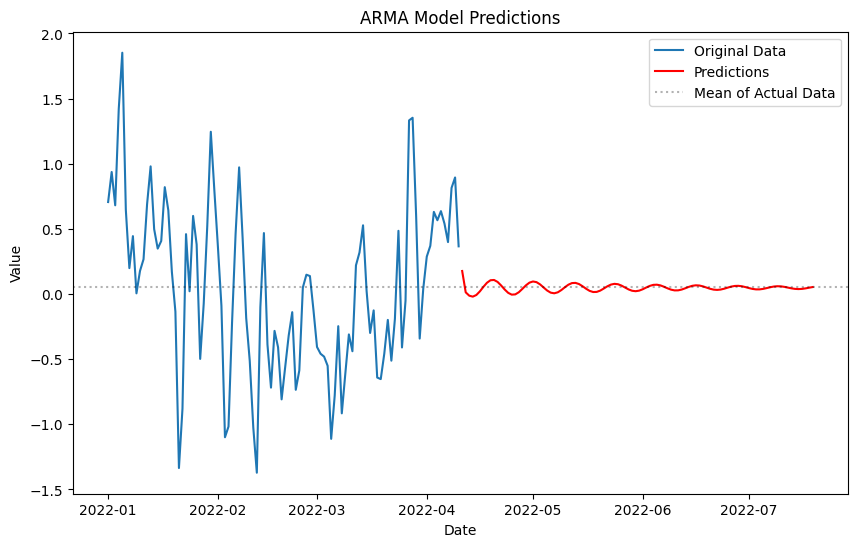

In [46]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(arma2_3_data, label='Original Data')
plt.plot(forecast, label='Predictions', color='red')

# Plot mean of actual data
mean_actual = arma2_3_data["Value"].mean()
plt.axhline(mean_actual, linestyle='dotted', color='black', alpha=0.3, label='Mean of Actual Data')

plt.title('ARMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()